## Step 4.4: Bi-Directional Elimination for Feature Selection

To perform another round of feature selection using a wrapper method called bi-directional elimination. This method iteratively adds and removes features to identify the optimal subset for predicting the target variable (Powerall).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load the Data set
df=pd.read_csv('Group_14_Clean_Data.csv')
df.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,280.2195,319.1130,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577


In [3]:
# Define features and target variable

X = df.drop(columns=['Powerall']) 
y = df['Powerall'] 

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Perform scaling after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.feature_selection import SequentialFeatureSelector

linear_model = LinearRegression()

In [38]:
# Perform Bi-Directional Elimination
bi_directional_selector = SequentialFeatureSelector(
    estimator=linear_model,
    n_features_to_select="auto",  
    direction='forward',  
    scoring='r2',  
    cv=3
)

In [39]:
# Fit the selector
bi_directional_selector.fit(X_train_scaled, y_train)

# Selected features
selected_features = X.columns[bi_directional_selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Y3', 'Y4', 'X7', 'X12', 'Y12', 'X14', 'Y15', 'X16', 'P1', 'P2', 'P3',
       'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14',
       'P15', 'P16'],
      dtype='object')


In [40]:
# Create reduced datasets
X_train_selected = X_train_scaled[:, bi_directional_selector.get_support()]
X_test_selected = X_test_scaled[:, bi_directional_selector.get_support()]

In [41]:
models_Feature_select= {
    "Linear_Regression": LinearRegression(),
    "K_Nearest_Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Random_Forest": RandomForestRegressor(n_estimators=50,max_depth= 10,random_state=42),
    "SVM_Linear_Kernel": SVR(kernel="linear"),
    "SVM_RBF_Kernel": SVR(kernel='rbf',C=100,gamma=0.1),
    "Gradient_Boosting": GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)
}

In [42]:
# Train models on selected features
final_results = {}
for model_name, model in models_Feature_select.items():
    model.fit(X_train_selected, y_train)
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    final_results[model_name] = {"Train_RMSE": train_rmse, "Test_RMSE": test_rmse,
                                 "Train_R2": train_r2, "Test_R2": test_r2}

In [43]:
# Convert results to DataFrame
final_results_df = pd.DataFrame(final_results).T
final_results_df

,Train_RMSE,Test_RMSE,Train_R2,Test_R2
Linear_Regression,369.958181,230.296733,0.999955,0.999983
K_Nearest_Neighbors,14996.456335,18327.087436,0.926267,0.892384
Random_Forest,20847.298757,23107.040965,0.857511,0.828929
SVM_Linear_Kernel,370.072199,229.977526,0.999955,0.999983
SVM_RBF_Kernel,25315.516332,25562.867836,0.789885,0.790633
Gradient_Boosting,18310.368112,18843.290447,0.890080,0.886237


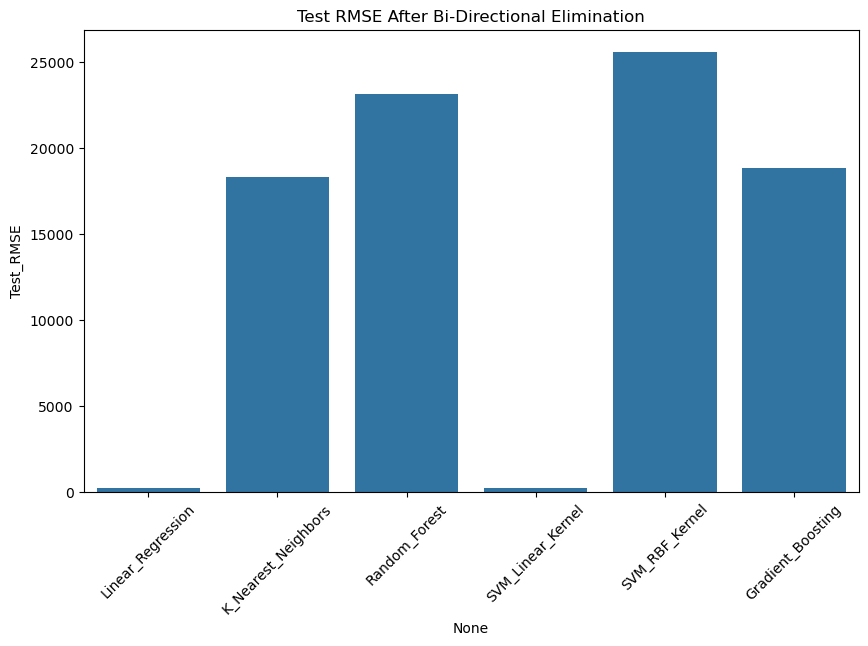

In [44]:
# Visualize performance after feature selection

plt.figure(figsize=(10, 6))
sns.barplot(x=final_results_df.index, y=final_results_df["Test_RMSE"])
plt.title("Test RMSE After Bi-Directional Elimination")
plt.xticks(rotation=45)
plt.show()